In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'mission6.csv')

In [5]:
df

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
0,56,27.0,132,11,Yes,Yes,No
1,69,38.4,123,12,No,No,No
2,46,34.1,111,2,Yes,No,Yes
3,32,25.5,149,3,Yes,Yes,Yes
4,60,30.8,111,2,Yes,No,Yes
...,...,...,...,...,...,...,...
995,38,33.4,112,10,Yes,No,Yes
996,70,22.8,99,13,Yes,Yes,Yes
997,68,28.7,111,14,No,Yes,Yes
998,59,40.0,87,8,Yes,No,Yes


In [7]:
df.shape

(1000, 7)

In [9]:
df.isna().sum()

Age                               0
BMI                               0
Blood Pressure                    0
Physical Activity (hours/week)    0
Family History                    0
Smoking Status                    0
Diabetes Risk                     0
dtype: int64

In [11]:
df.head()

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
0,56,27.0,132,11,Yes,Yes,No
1,69,38.4,123,12,No,No,No
2,46,34.1,111,2,Yes,No,Yes
3,32,25.5,149,3,Yes,Yes,Yes
4,60,30.8,111,2,Yes,No,Yes


In [13]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [14]:
le_col=['Family History','Smoking Status','Diabetes Risk']
le={}
for col in le_col:
    le[col]=LabelEncoder()
    df[col]=le[col].fit_transform(df[col])

In [15]:
import joblib

In [19]:
joblib.dump(le,'le_col.pkl')

['le_col.pkl']

In [21]:
std_col=['Age','BMI','Blood Pressure','Physical Activity (hours/week)']
std=StandardScaler()
df[std_col]=std.fit_transform(df[std_col])

In [23]:
joblib.dump(std,'std_col.pkl')

['std_col.pkl']

In [25]:
df.describe()

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.00000
mean,-1.705303e-16,-5.613288e-16,3.819167e-17,3.552714e-17,0.560000,0.502000,0.50000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.496635,0.500246,0.50025
min,-1.638548e+00,-1.726842e+00,-1.713266e+00,-1.641119e+00,0.000000,0.000000,0.00000
25%,-8.557523e-01,-8.208735e-01,-8.591729e-01,-9.700876e-01,0.000000,0.000000,0.00000
50%,-2.077018e-02,-1.125707e-01,-1.624126e-01,1.482979e-01,1.000000,1.000000,0.50000
75%,9.707711e-01,7.933979e-01,8.939659e-01,1.043006e+00,1.000000,1.000000,1.00000
max,1.492635e+00,1.814672e+00,1.837964e+00,1.490360e+00,1.000000,1.000000,1.00000


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

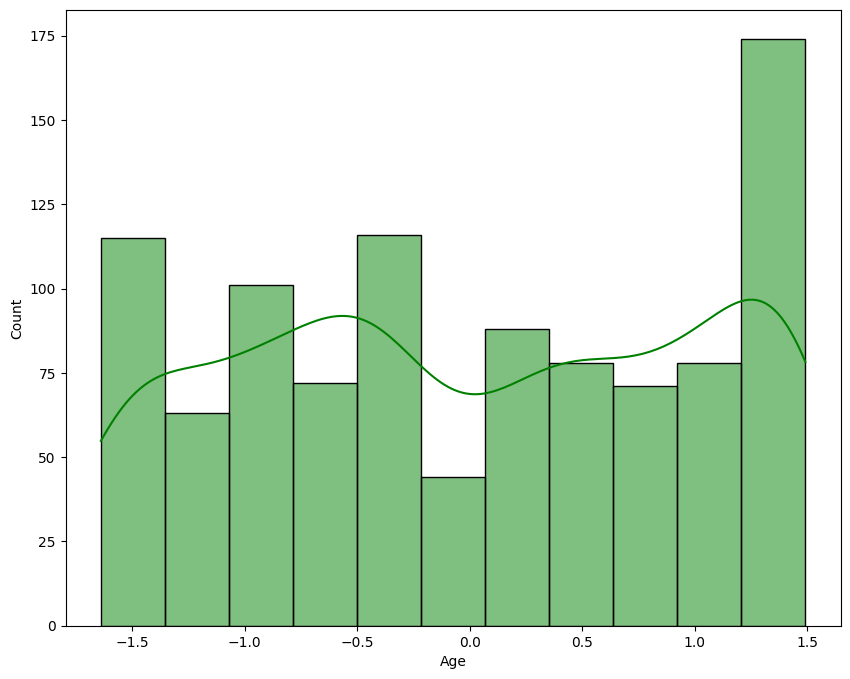

In [28]:
plt.figure(figsize=(10,8))
sns.histplot(x='Age',data=df,color='green',kde=True)

<Axes: xlabel='BMI', ylabel='Count'>

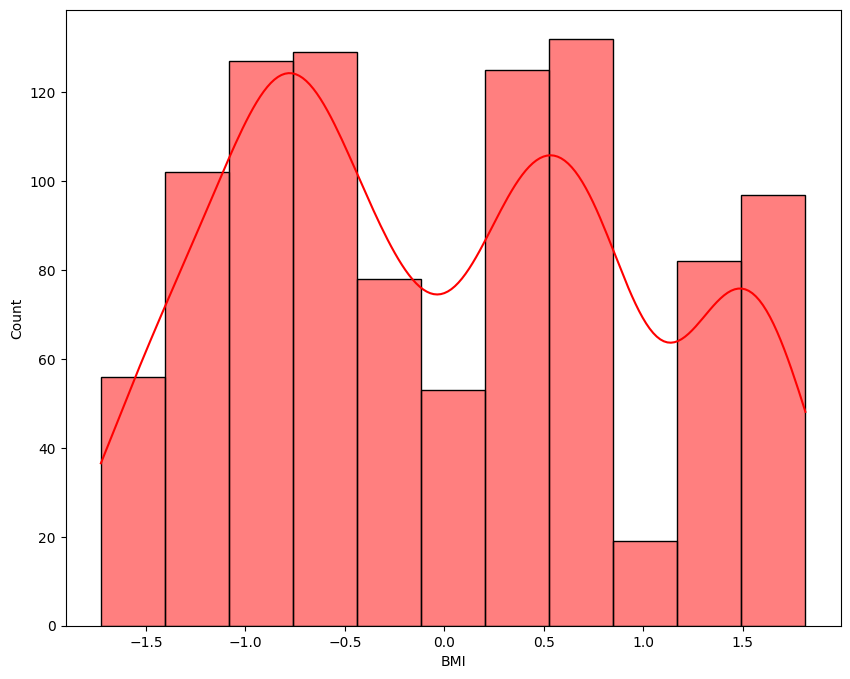

In [29]:
plt.figure(figsize=(10,8))
sns.histplot(x='BMI',data=df,color='red',kde=True)

<Axes: xlabel='Age', ylabel='Count'>

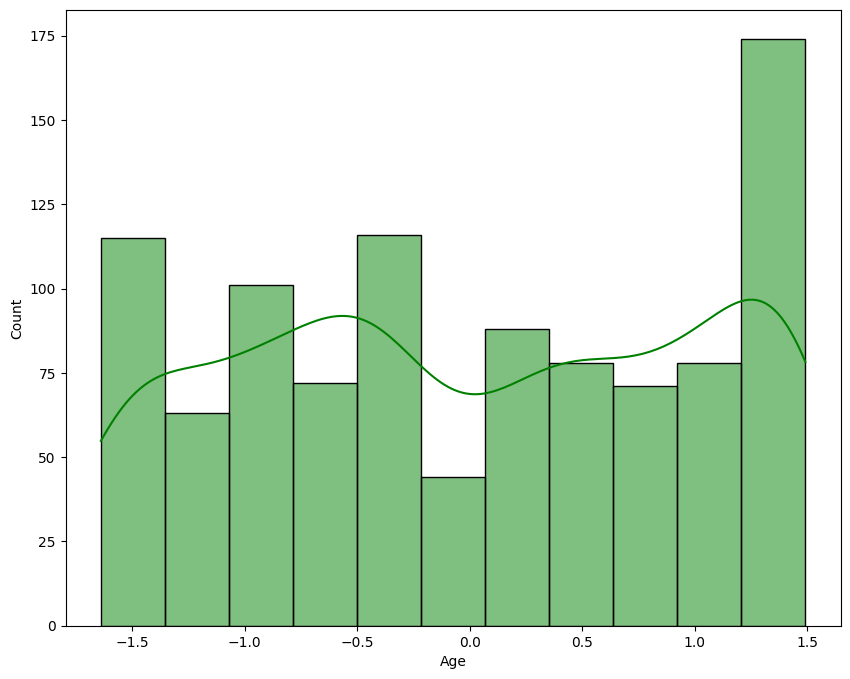

In [31]:
plt.figure(figsize=(10,8))
sns.histplot(x='Age',data=df,color='green',kde=True)

<Axes: xlabel='Family History', ylabel='Diabetes Risk'>

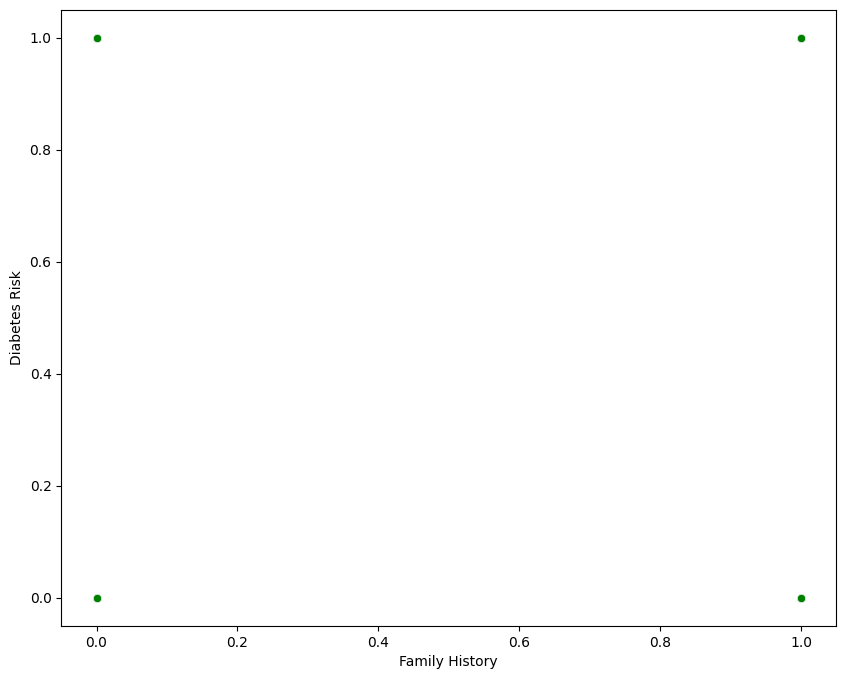

In [33]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Family History',y='Diabetes Risk',data=df,color='green')

<Axes: xlabel='Physical Activity (hours/week)', ylabel='Diabetes Risk'>

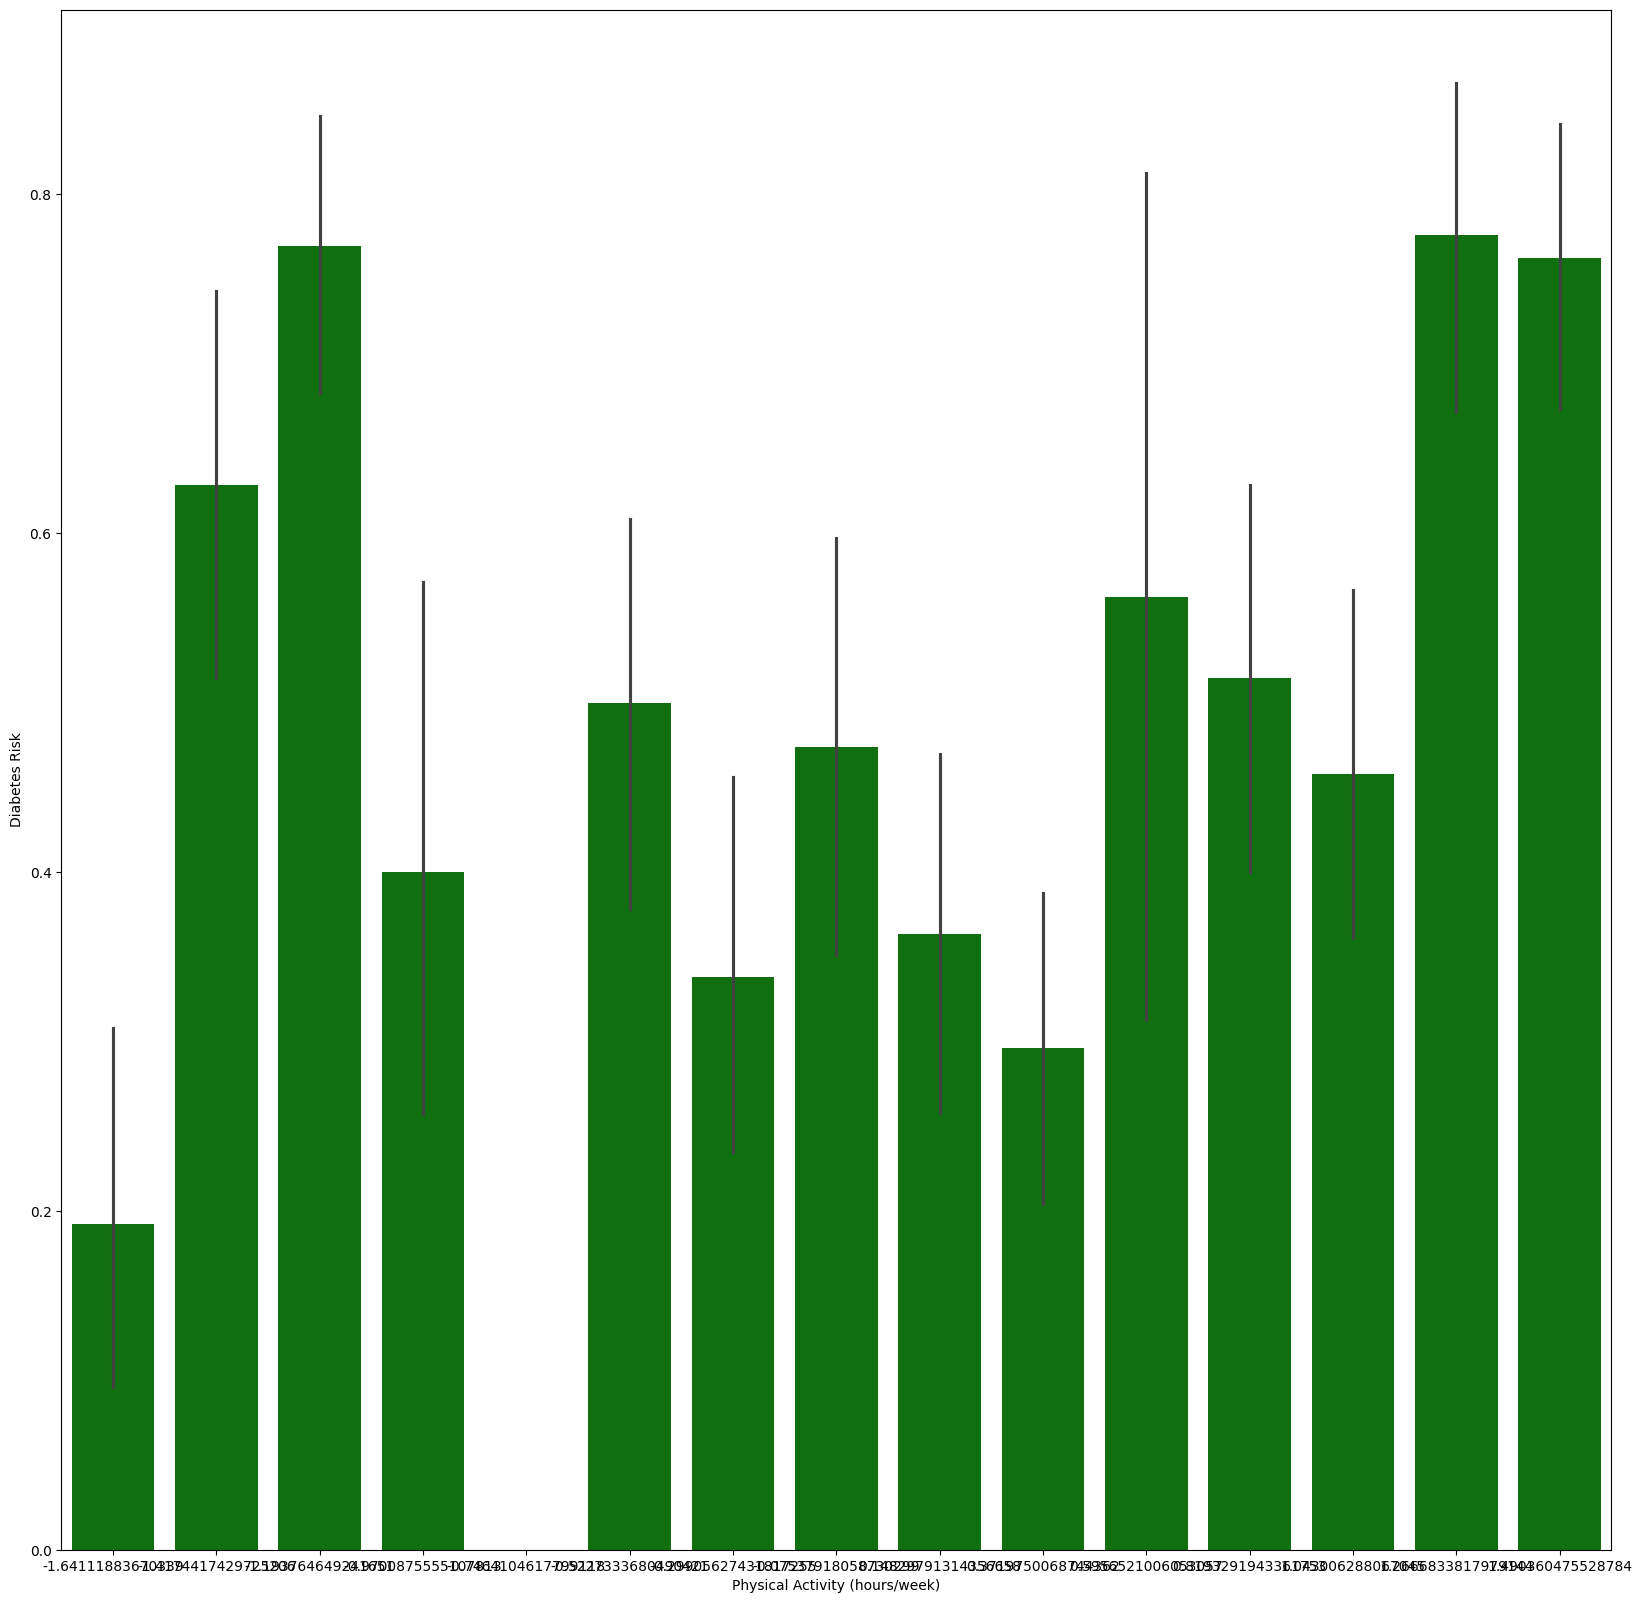

In [35]:
plt.figure(figsize=(20,20))
sns.barplot(x='Physical Activity (hours/week)',y='Diabetes Risk',data=df,color='green')

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x=df.drop('Diabetes Risk',axis=1)
y=df['Diabetes Risk']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [48]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
joblib.dump(lr,'model.pkl')

['model.pkl']

In [52]:
from sklearn.metrics import confusion_matrix,classification_report,recall_score

In [54]:
y_pred_lr=lr.predict(x_test)
y_pred_rf=rf.predict(x_test)
y_pred_dt=dt.predict(x_test)

In [56]:
print('Cr',classification_report(y_test,y_pred_lr))
print('Cr',classification_report(y_test,y_pred_rf))
print('Cr',classification_report(y_test,y_pred_dt))

Cr               precision    recall  f1-score   support

           0       0.53      0.59      0.56        96
           1       0.58      0.51      0.54       104

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200

Cr               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Cr               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [58]:
print('Cm',confusion_matrix(y_test,y_pred_lr))
print('Cm',confusion_matrix(y_test,y_pred_rf))
print('Cm',confusion_matrix(y_test,y_pred_dt))

Cm [[57 39]
 [51 53]]
Cm [[ 96   0]
 [  0 104]]
Cm [[ 96   0]
 [  0 104]]


In [60]:
print('re',recall_score(y_test,y_pred_lr))
print('re',recall_score(y_test,y_pred_rf))
print('re',recall_score(y_test,y_pred_dt))

re 0.5096153846153846
re 1.0
re 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

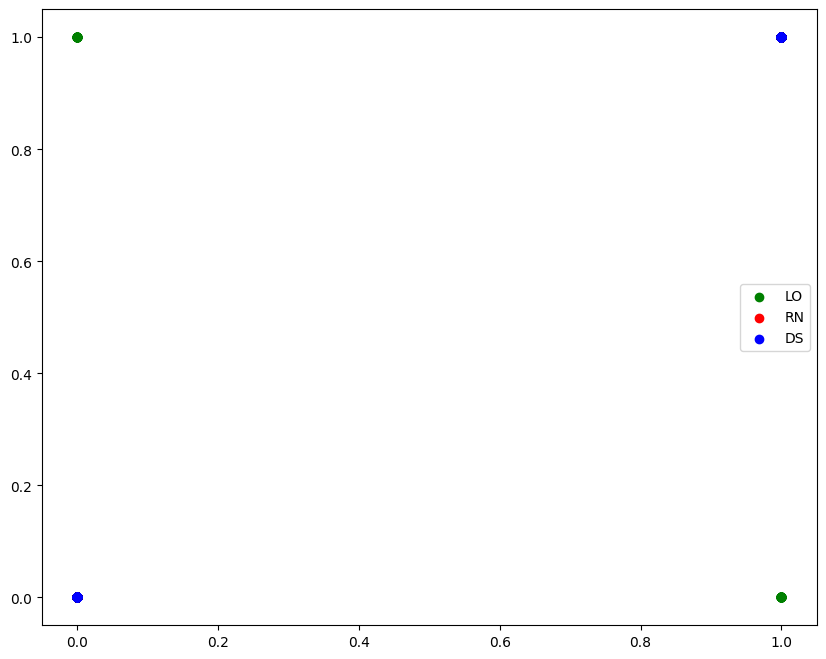

In [62]:
plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=y_pred_lr,color='green',label='LO')
plt.scatter(x=y_test,y=y_pred_rf,color='red',label='RN')
plt.scatter(x=y_test,y=y_pred_dt,color='blue',label='DS')
plt.legend()
plt.show

In [64]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [66]:
grid_pram={'max_iter':[10]}
grid_model=GridSearchCV(lr,grid_pram,cv=5)
grid_model.fit(x_train,y_train)

C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [10]})

In [68]:
print(grid_model.best_estimator_)

LogisticRegression(max_iter=10)


In [70]:
ron_pram={'max_depth':[10,20,30],'min_samples_split':[10,20,30]}
ron_model=RandomizedSearchCV(estimator=dt,param_distributions=ron_pram,cv=5)
ron_model.fit(x_train,y_train)

C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_split': [10, 20, 30]})

In [72]:
print(grid_model.best_params_)

{'max_iter': 10}


In [74]:
df.columns

Index(['Age', 'BMI', 'Blood Pressure', 'Physical Activity (hours/week)',
       'Family History', 'Smoking Status', 'Diabetes Risk'],
      dtype='object')

In [76]:
import gradio as gr

In [77]:
def predictio_model_C(age,bmi,bp,pa,fh,ss):
    try:
        input_data=pd.DataFrame({
            'Age':[age],
            'BMI':[bmi],
            'Blood Pressure':[bp],
            'Physical Activity (hours/week)':[pa],
            'Family History':[fh],
            'Smoking Status':[ss]
        })
        for col in['Family History','Smoking Status']:
            input_data[col]=le[col].transform(input_data[col])
        input_data[std_col]=std.transform(input_data[std_col])
        prediction=lr.predict(input_data)
        if prediction[0]==1:
            return 'Yes, have a diabets'
        else:
            return 'No diabets'
    except Exception as e:
        return str(e)
gr.Interface(
    fn=predictio_model_C,
    inputs=[
        gr.Number(label='Age'),
        gr.Number(label='BMI'),
        gr.Number(label='Blood Pressure'),
        gr.Number(label='Physical Activity (hours/week)'),
        gr.Dropdown(choices=['Yes','No'],label='Family History'),
        gr.Dropdown(choices=['Yes','No'],label='Smoking Status')
    ],
    outputs=gr.Textbox(label='Prediction')
).launch()

* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
